# Simple image denoising example using 2-dimensional FFT

**Illustrates**: 2-d image denoising, use of the numpy FFT library, array
manipulations, image plotting.

Let's try to denoise the following image with naive numpy manipulations:

<center>
<img src="files/hw_0_data/moonlanding.png" width=30%/>
</center>

The convolution of an input with with a linear filter in the termporal or
spatial domain is equivalent to multiplication by the Fourier transforms of the
input and the filter in the spectral domain.  This provides a conceptually
simple way to think about filtering: transform your signal into the frequency
domain, dampen the frequencies you are not interested in by multiplying the
frequency spectrum by the desired weights, and then apply the inverse transform
to the modified spectrum, back into the original domain.  In the example below,
we will simply set the weights of the frequencies we are uninterested in (the
high frequency noise) to zero rather than dampening them with a smoothly
varying function.  Although this is not usually the best thing to do, since
sharp edges in one domain usually introduce artifacts in another (eg high
frequency "ringing"), it is easy to do and sometimes provides satisfactory
results.

<center>
<img src="files/hw_0_data/moon_denoise.png" width=60%/>
</center>

High frequency noise filtering of a 2D image in the Fourier domain.  The upper panels show the original image (left) and spectral power (right) and    the lower panels show the same data with the high frequency power set to    zero.  Although the input and output images are grayscale, you can provide    colormaps to `imshow` to plot them in pseudo-color, with the `cmap` argument to `imshow`, which accepts any of the colormaps found in the `matplotlib.cm` module.

## Exercise

After reading the image file `moonlanding.png` from the data directory, try to produce images like the ones in the figure.  We will describe the process here and provide some hints as to what you need to think about.
   
The image in the upper left panel of the Figure is a grayscale photo of the
moon landing.  There is a banded pattern of high frequency noise polluting the image.  In the upper right panel we see the 2D spatial frequency spectrum.  The FFT output in the `numpy.fft` module is packed with the lower freqeuencies starting in the upper left, and proceeding to higher frequencies as one moves to the center of the spectrum (this is the most efficient way numerically to fill the output of the FFT algorithm).  Because the input signal is real, the output spectrum is complex and symmetrical: the transformation values beyond the midpoint of the frequency spectrum (the Nyquist frequency) correspond to the values for negative frequencies and are simply the mirror image of the positive frequencies below the Nyquist (this is true for the 1D, 2D and ND FFTs in `numpy`).

You should compute the 2D spatial frequency spectra of the luminance image,
zero out the high frequency components, and inverse transform back into the
spatial domain.  You can plot the input and output images with
`plt.imshow`, but you should observe that if you show the power spectrum
(the absolute value of the FFT) directly, you will only see white, and not the image in the Figure's upper right panel.  This is due to the fact that the power spectrum has a small number of pixels with extremely high amplitude, which completely swamp the contrast (you can verify this by playing with a histogram of the data).

In [2]:
%pylab inline

import sys
import numpy as np
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Here's a handy utility for you that normalizes the peaks in the spectrum so the huge dynamic range in this image doesn't swamp the plot. You can take this as a given.

In [3]:
def plot_spectrum(F, amplify=1000, ax=None):
    """Normalise, amplify and plot an amplitude spectrum."""

    # Note: the problem here is that we have a spectrum whose histogram is
    # *very* sharply peaked at small values.  To get a meaningful display, a
    # simple strategy to improve the display quality consists of simply
    # amplifying the values in the array and then clipping.

    # Compute the magnitude of the input F (call it mag).  Then, rescale mag by
    # amplify/maximum_of_mag.
    mag = abs(F) 
    mag *= amplify/mag.max() 
    
    # Next, clip all values larger than one to one.
    mag[mag > 1] = 1 

    if ax is None: ax = plt.gca()
    ax.imshow(mag, plt.cm.Blues)

Read in original image, convert to floating point for further
manipulation; imread returns a MxNx4 RGBA image.  Since the image is
grayscale, just extract the 1st channel

**Hints:**

* use `plt.imread()` to load the file
* convert to a float array with the `.astype()` method
* extract all rows, all columns, 0-th plane to get the first channel
* the resulting array should have 2 dimensions only

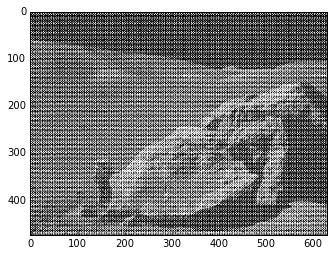

In [24]:
fname = 'hw_0_data/moonlanding.png'
# your code here, you should get this image shape when done:
# Image shape: (474, 630)
im_raw = plt.imread(fname)
im_raw.shape
# im_raw.astype(float)
plt.imshow(im_raw,cm.gray)

Compute the 2d FFT of the input image, look at the center of the spectrum, and simply truncate everything but the corners to zero.

**Hints:** 

* Look for a 2-d FFT in `np.fft`.

* Call this variable 'F', which is the name we'll be using below.

* In the lines following, we'll make a copy of the original spectrum and truncate coefficients.  

* In the lines following, we'll make a copy of the original spectrum and truncate coefficients. 

* In Python, a complex number `z` has `z.real` and `z.imag` attributes for its real and imaginary parts.  

D:\Anaconda2_40\lib\site-packages\ipykernel\__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
D:\Anaconda2_40\lib\site-packages\ipykernel\__main__.py:25: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


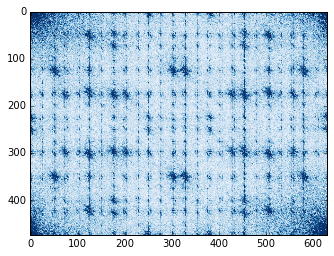

In [25]:
# Assign the 2d FFT to `F`
#...
F = np.fft.fft2(im_raw)
# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform.  Numpy arrays have a copy
# method for this purpose.
# ...
ff = F.copy()


# Set r and c to be the number of rows and columns of the array.
# ....
r,c = shape(im_raw)


# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
#... 
F[r*keep_fraction:r*(1-keep_fraction),:] = 0

# Similarly with the columns:
#... 
F[:,c*keep_fraction:c*(1-keep_fraction)] = 0

plot_spectrum(ff)

Reconstruct the denoised image from the filtered spectrum, keep only the
real part for display.


**Hint:**

There's an inverse 2d fft in the `np.fft` module as well (don't forget that you only want the real part). Call the result `im_new` and plot the results.

In [26]:
def image_grid(im, F, im2, F2):
    """Display a grid with two images and their corresponding
    Fourier spectra.
    """
    fig, ax = plt.subplots(2, 2, figsize=(10,7))
    
    ax[0,0].set_title('Original image')
    ax[0,0].imshow(im, plt.cm.gray)
    
    ax[0,1].set_title('Fourier transform')
    plot_spectrum(F, ax=ax[0,1])
    
    ax[1,1].set_title('Filtered Spectrum')
    plot_spectrum(F2, ax=ax[1,1])
    
    ax[1,0].set_title('Reconstructed Image')
    ax[1,0].imshow(im2, plt.cm.gray)

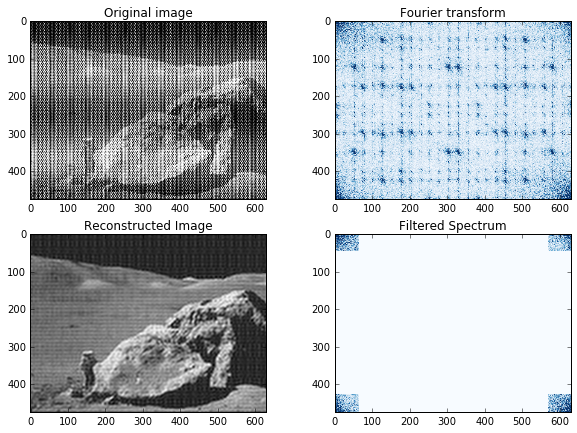

In [27]:
# im_new =   # new image here, from inverse FFT of truncated data

im_new = np.fft.ifft2(F)
# im_new = im_new.real

# call plotting routine here...
# imshow(im_new,cm.gray)
image_grid(im_raw,ff.real,im_new.real,F.real)

Repeat the process above, but instead of simply zeroing out an entire region, multiply the spectrum by a gaussian-type envelope that more gradually smooths outthe center and leaves the corners intact.

**Hints**

- Experiment with envelopes of the type:

$$g(x,y) = 1-\exp(-\alpha(x^2+y^2)^k)$$

for different values of $\alpha$ and $k$.

- Plot a line profile of the above function at y=0 to get a feel for the shape of your envelope.

- To evaluate the array over the 2-d domain, look for the `np.meshgrid` function.

In [30]:
# We create a mesh, shaped like our image, where we can evaluate
# our function (needs explanation)
x_min = -shape(im_raw)[1]/2+1
x_max = shape(im_raw)[1]/2
x_range = shape(im_raw)[1]
y_min = -shape(im_raw)[0]/2+1
y_max = shape(im_raw)[0]/2
y_range = shape(im_raw)[0]

mesh = np.meshgrid(linspace(x_min,x_max,x_range), linspace(y_min,y_max,y_range))
#mesh

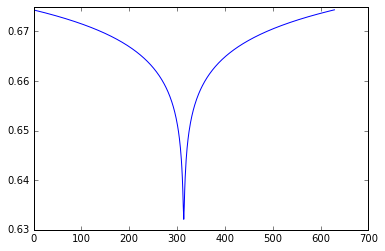

In [32]:
# Generate the gaussian-type mask (this section needs explanation)
# a = .1 #   where function will fall to zero
# k = .01 #  speed with which function drops to 0
a = 1e-10
k = 1.e-2
mask = 1. - np.exp(-1*(mesh[0]**2+mesh[1]**2)**k)

# Look at the mid-line to see a 1-d plot, which is easier to
# interpret
plt.plot(mask[shape(mask)[0]/2,:])
#plot_spectrum(ff_new)
#im_new_c = np.fft.ifft2(ff_new)
#im_new_c = im_new_c.real
#imshow(im_new_c,cm.gray)

# Plot both the line and the image

Now, use this mask on the spectrum and reconstruct again:

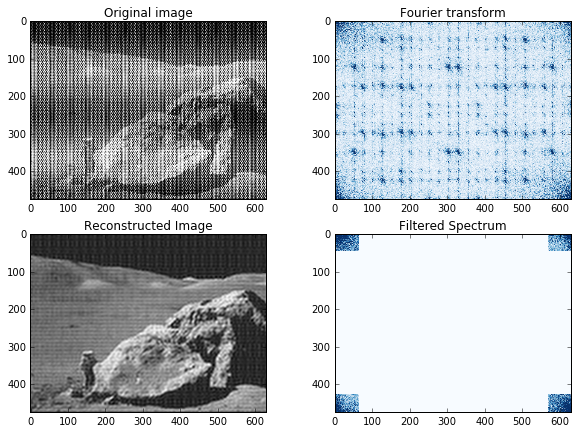

In [33]:
# your code here
ff2 = F.copy()*mask
im_new_2 = np.fft.ifft2(ff2).real
image_grid(im_raw,ff.real,im_new_2,ff2)

## Discussion

The above is an extremely crude way to do image denoising, and image processing is a vast and complex topic. This should simply give you an idea for the kinds of tools and basic operations involved.

If you are interested in the topic, the excellent [scikit-image](http://scikit-image.org) image processing toolkit for Python has a large collection of informative examples, as well as high-quality implementations of many algorithms.